## Model Evaluation for college scorecard - earnings prediction

This notebook will use several different supervised learning regression algorithms to model earnings after college using College Scorecard data. The models included for evaluation will be:

1. Linear Regression
1. Decision Tree
1. Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 12345
#load the data

data = pd.read_pickle('clean_notna_data.pickle')
X = data['X']
y = data['y']
name = X['INSTNM']
X.drop('INSTNM', axis = 1, inplace = True)
data = X.copy()
data['Y'] = y

X.head()

,MAIN,NUMBRANCH,ADM_RATE,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,...,CCSIZSET_17.0,CCSIZSET_nan,PFTFAC_ISNA,INEXPFTE_ISNA,AVGFACSAL_ISNA,GRAD_DEBT_MDN_ISNA,C150_4_ISNA,ADM_RATE_ISNA,TUITION_ISNA,TUITION_OUT_ISNT_IN
0,1,1.0,0.5575,0.0426,0.0019,0.0155,0.0000,0.0000,0.031,0.0756,...,0,0,0,0,0,0,0,0,0,1
1,1,1.0,0.9117,0.0000,0.0000,0.0000,0.0006,0.0540,0.000,0.0276,...,0,0,0,0,0,0,0,0,0,1
2,1,1.0,0.9050,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0574,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,0.6931,0.0000,0.0000,0.0000,0.0000,0.0393,0.000,0.1253,...,0,0,0,0,0,0,0,0,0,1
4,1,1.0,0.8462,0.0000,0.0000,0.0000,0.0041,0.1192,0.000,0.0164,...,0,0,0,0,0,0,0,0,0,1


### Data preprocessing
We need to split the data into training and test sets. Also, we need to think about possibly centering/normalizing the data.

Normalizing may make sense at least for linear regression, so we can understand the features a little bit better

Also, we can think about using PCA (if only for visualization purposes)

In [2]:
# Split the data into training and test
# Need to figure out best way to split time series data
# Do we split based only on colleges (i.e. each college is either train or test)
# Do we split based on college and year (i.e. each data entry is either train or test)
# Another way to split?

train_test_index = {0:'',1:'',2:'',3:'',4:'',5:''}
for i in range(0,6):
    train_test_index[i] = {
        'train': X[X['YEAR'] <= i+2002].index,
        'test' : X[X['YEAR'] == i + 2003].index
    }
X.drop('YEAR', axis = 1, inplace = True)

In [3]:
from sklearn.model_selection import train_test_split
train_val_index = list()
train_val_dataset = list()
for i in range(len(train_test_index)):
    X_i = X.iloc[train_test_index[i]['train']]
    y_i = y.iloc[train_test_index[i]['train']]
    train_val_dataset.append(train_test_split(X_i,y_i,test_size = .2, random_state = seed))
    train_val_index.append((train_val_dataset[i][0].index,train_val_dataset[i][1].index))

### Linear Regression
First try: no feature scaling

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as m_s_e
from sklearn.metrics import mean_absolute_error as m_a_e

r2_array = {'train': list(), 'val': list()}
mse_array = {'train': list(), 'val': list()}
mae_array = {'train': list(), 'val': list()}

linreg_coeffs = np.zeros_like(X.columns)
for i in range(0,6):
    X_train = X.loc[train_test_index[i]['train']]
    y_train = y.iloc[train_test_index[i]['train']]
    X_test = X.loc[train_test_index[i]['test']]
    y_test = y.iloc[train_test_index[i]['test']]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    r2_array['train'].append(lin_reg.score(X_train, y_train))
    mse_array['train'].append(m_s_e(y_train, lin_reg.predict(X_train)))
    mae_array['train'].append(m_a_e(y_train, lin_reg.predict(X_train)))
    
    r2_array['val'].append(lin_reg.score(X_test, y_test))
    mse_array['val'].append(m_s_e(y_test, lin_reg.predict(X_test)))
    mae_array['val'].append(m_a_e(y_test, lin_reg.predict(X_test)))
    
    linreg_coeffs += lin_reg.coef_
    
linreg_coeffs /= 6
print('R^2 of training set: ',np.mean(r2_array['train']))
print('MSE of training set: ',np.mean(mse_array['train']))
print('RMSE of training set: ', np.sqrt(np.mean(mse_array['train'])))
print('MAE of training set: ',np.mean(mae_array['train']))
print()
print('R^2 of validation set: ',np.mean(r2_array['val']))
print('MSE of validation set: ',np.mean(mse_array['val']))
print('RMSE of validation set: ', np.sqrt(np.mean(mse_array['val'])))
print('MAE of validation set: ',np.mean(mae_array['val']))
print()
print('Coefficients:')
sorted_inds = np.argsort(-(np.abs(linreg_coeffs)))[:20]
for i in sorted_inds:
    print(X.columns[i], ': ', linreg_coeffs[i])

R^2 of training set:  0.8354695882995418
MSE of training set:  13975015.948902065
RMSE of training set:  3738.3172616702914
MAE of training set:  2675.3443939881936

R^2 of validation set:  0.8171420557005532
MSE of validation set:  14893159.98199828
RMSE of validation set:  3859.165710616516
MAE of validation set:  2843.6943177185126

Coefficients:
PCIP14 :  212045.018870773
PCIP54 :  204349.27633699894
PCIP29 :  197155.64544230278
PCIP10 :  193362.7003692057
PCIP46 :  191251.54628136917
PCIP15 :  190445.83456037077
PCIP47 :  190054.77813170548
PCIP48 :  189296.36537719518
PCIP52 :  187028.0943320917
PCIP51 :  186942.04911731093
PCIP11 :  186751.7580013466
PCIP40 :  186633.7413034727
PCIP41 :  184761.0342700867
PCIP24 :  183182.7248339264
PCIP22 :  182827.5252990272
PCIP27 :  182712.77417633907
PCIP16 :  182671.52385840903
PCIP49 :  182616.41419035205
PCIP31 :  182248.37746913123
PCIP43 :  181264.37969528104


Second try: feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

r2_array = {'train': list(), 'val': list()}
mse_array = {'train': list(), 'val': list()}
mae_array = {'train': list(), 'val': list()}

linreg_coeffs = np.zeros_like(X.columns)

accuracy_array = {'train': list(), 'val': list()}
for i in range(0,6):
    X_train = X_scaled[train_test_index[i]['train']]
    y_train = y[train_test_index[i]['train']]
    X_test = X_scaled[train_test_index[i]['test']]
    y_test = y[train_test_index[i]['test']]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    r2_array['train'].append(lin_reg.score(X_train, y_train))
    mse_array['train'].append(m_s_e(y_train, lin_reg.predict(X_train)))
    mae_array['train'].append(m_a_e(y_train, lin_reg.predict(X_train)))
    
    r2_array['val'].append(lin_reg.score(X_test, y_test))
    mse_array['val'].append(m_s_e(y_test, lin_reg.predict(X_test)))
    mae_array['val'].append(m_a_e(y_test, lin_reg.predict(X_test)))
    
    linreg_coeffs += lin_reg.coef_
    
linreg_coeffs /= 6
print('R^2 of training set: ',np.mean(r2_array['train']))
print('MSE of training set: ',np.mean(mse_array['train']))
print('RMSE of training set: ', np.sqrt(np.mean(mse_array['train'])))
print('MAE of training set: ',np.mean(mae_array['train']))
print()
print('R^2 of validation set: ',np.mean(r2_array['val']))
print('MSE of validation set: ',np.mean(mse_array['val']))
print('RMSE of validation set: ', np.sqrt(np.mean(mse_array['val'])))
print('MAE of validation set: ',np.mean(mae_array['val']))
print()
print('Coefficients:')
sorted_inds = np.argsort(-(np.abs(linreg_coeffs)))[:10]
for i in sorted_inds:
    print(X.columns[i], ': ', linreg_coeffs[i])

R^2 of training set:  0.8352309040214538
MSE of training set:  13995449.207342586
RMSE of training set:  3741.0492120984704
MAE of training set:  2679.2907020314797

R^2 of validation set:  -5.0599632304910454e+20
MSE of validation set:  4.049105707232007e+28
RMSE of validation set:  201223897865835.2
MAE of validation set:  3607113131949.399

Coefficients:
STABBR_ME :  -1.1682982844336448e+16
STABBR_MA :  -1.0583384783082038e+16
STABBR_ME :  1.0132634293596682e+16
REGION_Rocky Mountains  :  9495514870901398.0
STABBR_ND :  -8530668197710105.0
STABBR_ID :  -8268831467818983.0
STABBR_MH :  -7812868285526044.0
STABBR_PR :  7737625358605040.0
STABBR_MH :  7375171904309497.0
STABBR_IL :  7334650221712856.0


### Random forest


In [11]:
n_estimators = 120
max_features = [0.3,0.4,0.5,0.66,0.75,0.9,0.99, 1]

# initialize accuracy dict which will have accuracy values for each run of the parameter tuning
accuracy_dict = dict()
for max_f in max_features:
    accuracy_dict[max_f] = {'r2':
                                {'train':
                                    {'list':list(),
                                     'mean': 0},
                                'test':
                                    {'list':list(),
                                     'mean': 0},
                                'oob':
                                    {'list':list(),
                                     'mean': 0}},
                            'mse':
                                {'train':
                                    {'list':list(),
                                     'mean': 0},
                                'test':
                                    {'list':list(),
                                     'mean': 0},
                                'oob':
                                    {'list':list(),
                                     'mean': 0}},
                            'mae':
                                {'train':
                                    {'list':list(),
                                     'mean': 0},
                                'test':
                                    {'list':list(),
                                     'mean': 0},
                                'oob':
                                    {'list':list(),
                                     'mean': 0}}}

for max_f in max_features:
    for i in range(0,6):
        X_train = X.loc[train_test_index[i]['train']]
        y_train = y.iloc[train_test_index[i]['train']]
        X_test = X.loc[train_test_index[i]['test']]
        y_test = y.iloc[train_test_index[i]['test']]
        rand_forest = RandomForestRegressor(n_estimators = n_estimators, max_features = max_f,
                                        criterion = 'mse', oob_score = True, random_state = seed)
        rand_forest.fit(X_train, y_train)

        accuracy_dict[max_f]['r2']['oob']['list'].append(rand_forest.oob_score_)
        accuracy_dict[max_f]['mse']['oob']['list'].append(m_s_e(y_train, rand_forest.oob_prediction_))
        accuracy_dict[max_f]['mae']['oob']['list'].append(m_a_e(y_train, rand_forest.oob_prediction_))
        
        accuracy_dict[max_f]['r2']['train']['list'].append(rand_forest.score(X_train, y_train))
        accuracy_dict[max_f]['mse']['train']['list'].append(m_s_e(y_train, rand_forest.predict(X_train)))
        accuracy_dict[max_f]['mae']['train']['list'].append(m_a_e(y_train, rand_forest.predict(X_train)))
        
        accuracy_dict[max_f]['r2']['test']['list'].append(rand_forest.score(X_test, y_test))
        accuracy_dict[max_f]['mse']['test']['list'].append(m_s_e(y_test, rand_forest.predict(X_test)))
        accuracy_dict[max_f]['mae']['test']['list'].append(m_a_e(y_test, rand_forest.predict(X_test)))
    
    
    accuracy_dict[max_f]['r2']['oob']['mean'] = np.mean(accuracy_dict[max_f]['r2']['oob']['list'])
    accuracy_dict[max_f]['mse']['oob']['mean'] = np.mean(accuracy_dict[max_f]['mse']['oob']['list'])
    accuracy_dict[max_f]['mae']['oob']['mean'] = np.mean(accuracy_dict[max_f]['mae']['oob']['list'])
    
    accuracy_dict[max_f]['r2']['train']['mean'] = np.mean(accuracy_dict[max_f]['r2']['train']['list'])
    accuracy_dict[max_f]['mse']['train']['mean'] = np.mean(accuracy_dict[max_f]['mse']['train']['list'])
    accuracy_dict[max_f]['mae']['train']['mean'] = np.mean(accuracy_dict[max_f]['mae']['train']['list'])
                            
    accuracy_dict[max_f]['r2']['test']['mean'] = np.mean(accuracy_dict[max_f]['r2']['test']['list'])
    accuracy_dict[max_f]['mse']['test']['mean'] = np.mean(accuracy_dict[max_f]['mse']['test']['list'])
    accuracy_dict[max_f]['mae']['test']['mean'] = np.mean(accuracy_dict[max_f]['mae']['test']['list'])
    print(max_f)
                            
#change other parameters as we see fit (probably max_depth, min_size_leaf, min_size_split)

0.3
0.4
0.5
0.66
0.75
0.9
0.99
1


In [12]:
column_pairs = list()
groups = ['oob', 'train', 'test']
metrics = ['r2', 'rmse', 'mae']
for group in groups:
    for metric in metrics:
        column_pairs.append((group, metric))

micolumns = pd.MultiIndex.from_tuples(column_pairs)

accuracy_means = pd.DataFrame(columns = micolumns)

In [13]:
for max_f in max_features:
    oob_r2 = accuracy_dict[max_f]['r2']['oob']['mean']
    oob_mse = accuracy_dict[max_f]['mse']['oob']['mean']
    oob_rmse = np.sqrt(oob_mse)
    oob_mae = accuracy_dict[max_f]['mae']['oob']['mean']
    
    train_r2 = accuracy_dict[max_f]['r2']['train']['mean']
    train_mse = accuracy_dict[max_f]['mse']['train']['mean']
    train_rmse = np.sqrt(train_mse)
    train_mae = accuracy_dict[max_f]['mae']['train']['mean']
    
    test_r2 = accuracy_dict[max_f]['r2']['test']['mean']
    test_mse = accuracy_dict[max_f]['mse']['test']['mean']
    test_rmse = np.sqrt(test_mse)
    test_mae = accuracy_dict[max_f]['mae']['test']['mean']
    
    accuracy_means.loc[max_f] = [oob_r2, oob_rmse, oob_mae,train_r2,train_rmse,train_mae,
                                 test_r2,test_rmse,test_mae]
accuracy_means.sort_index(inplace = True)
accuracy_means

oob                               train                           \
            r2         rmse          mae        r2         rmse         mae   
0.30  0.886227  3126.369177  2065.003002  0.978362  1361.426834  822.559732   
0.40  0.888110  3099.757668  2058.118131  0.978645  1352.284100  819.711984   
0.50  0.888383  3096.232261  2066.169908  0.978763  1348.589436  822.352180   
0.66  0.886816  3117.822185  2070.844571  0.978558  1355.077592  824.016909   
0.75  0.886953  3115.671492  2071.002894  0.978575  1354.472646  823.968346   
0.90  0.885997  3128.555858  2083.861919  0.978444  1358.553540  828.768269   
0.99  0.885527  3134.577940  2091.412625  0.978411  1359.446839  831.380289   
1.00  0.859112  3484.577935  2251.436674  0.974627  1476.325531  891.387776   

          test                            
            r2         rmse          mae  
0.30  0.910287  2708.131001  1981.932641  
0.40  0.909066  2725.353794  1981.678246  
0.50  0.907719  2744.741094  1998.356494  
0.66  0.905889  2770.540417  2009.603919  
0.75  0.905089  2783.574444  2018.715208  
0.90  0.901416  2835.883118  2040.261954  
0.99  0.900096  2854.509247  2046.789965  
1.00  0.911089  2700.385617  1954.955274

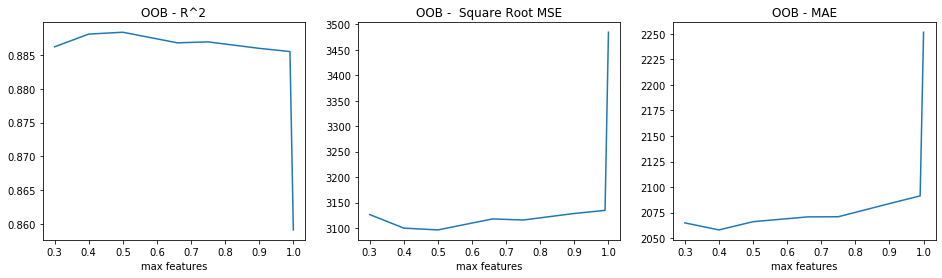

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(16,4))
ax1.plot(accuracy_means.index, accuracy_means['oob', 'r2'])
ax1.title.set_text('OOB - R^2')
ax1.set_xlabel('max features')
ax2.plot(accuracy_means.index, accuracy_means['oob', 'rmse'])
ax2.title.set_text('OOB -  Square Root MSE')
ax2.set_xlabel('max features')
ax3.plot(accuracy_means.index, accuracy_means['oob', 'mae'])
ax3.title.set_text('OOB - MAE')
ax3.set_xlabel('max features')
plt.show()

##### Using optimal max_features to find feature importance

In [15]:
best_max_f = 0.5

r2_array = {'train': list(), 'test': list()}
mse_array = {'train': list(), 'test': list()}
mae_array = {'train': list(), 'test': list()}

feature_importances = np.zeros_like(X.columns)
for i in range(0,6):
    X_train = X.loc[train_test_index[i]['train']]
    y_train = y.iloc[train_test_index[i]['train']]
    X_test = X.loc[train_test_index[i]['test']]
    y_test = y.iloc[train_test_index[i]['test']]
    rand_forest = RandomForestRegressor(criterion = 'mse',oob_score = True, max_features = best_max_f,
                                        random_state = seed, n_estimators = 100)
    rand_forest.fit(X_train, y_train)
    
    oob_array.append(rand_forest.oob_score_)
    
    r2_array['train'].append(rand_forest.score(X_train, y_train))
    mse_array['train'].append(m_s_e(y_train, rand_forest.predict(X_train)))
    mae_array['train'].append(m_a_e(y_train, rand_forest.predict(X_train)))
    
    r2_array['test'].append(rand_forest.score(X_test, y_test))
    mse_array['test'].append(m_s_e(y_test, rand_forest.predict(X_test)))
    mae_array['test'].append(m_a_e(y_test, rand_forest.predict(X_test)))
    
    feature_importances += rand_forest.feature_importances_
feature_importances /= 6

print('OOB score : ', np.mean(oob_array))
print('R^2 of training set: ',np.mean(r2_array['train']))
print('MSE of training set: ',np.mean(mse_array['train']))
print('RMSE of training set: ', np.sqrt(np.mean(mse_array['train'])))
print('MAE of training set: ',np.mean(mae_array['train']))
print()
print('R^2 of Test set: ',np.mean(r2_array['test']))
print('MSE of Test set: ',np.mean(mse_array['test']))
print('RMSE of Test set: ', np.sqrt(np.mean(mse_array['test'])))
print('MAE of Test set: ',np.mean(mae_array['test']))
print()

OOB score :  0.8826706680172158
R^2 of training set:  0.9785731489046549
MSE of training set:  1835196.0762083225
RMSE of training set:  1354.6940895302978
MAE of training set:  823.4060812309908

R^2 of Test set:  0.9074764782059304
MSE of Test set:  7557282.020185921
RMSE of Test set:  2749.05111269069
MAE of Test set:  1997.0481197430818



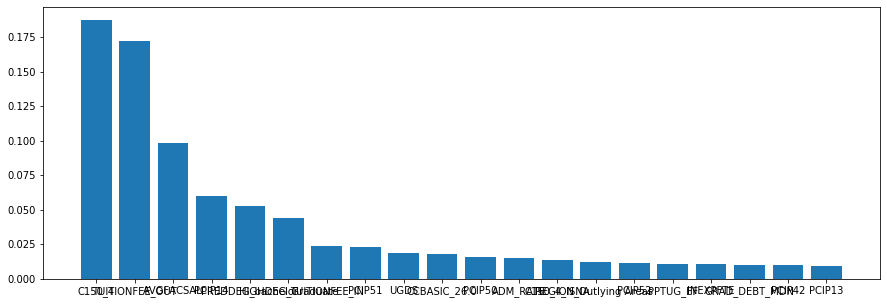

C150_4 :  0.1874113007102697
TUITIONFEE_OUT :  0.1722641413508171
AVGFACSAL :  0.0985340861427324
PCIP14 :  0.060129928905361334
PREDDEG_bachelor :  0.05274599622885642
HIGHDEG_Graduate :  0.04387870704294064
TUITIONFEE_IN :  0.023548977217487718
PCIP51 :  0.023220841614329163
UGDS :  0.018529836081854063
CCBASIC_26.0 :  0.018023655677644766
PCIP50 :  0.01584676428107731
ADM_RATE :  0.015038229007622882
C150_4_ISNA :  0.014029756809829397
REGION_Outlying Areas  :  0.012503216642514694
PCIP52 :  0.011777266277648335
PPTUG_EF :  0.010789813207827384
INEXPFTE :  0.010461036353355718
GRAD_DEBT_MDN :  0.010213497899149914
PCIP42 :  0.00980943157711934
PCIP13 :  0.009509828853294846


In [16]:
x = np.arange(20)
sorted_inds = np.argsort(-(feature_importances))[:20]
sorted_colnames = X.columns[sorted_inds]
fig = plt.figure(figsize = (15,5))
plt.bar(x,feature_importances[sorted_inds], width = 0.8)
plt.xticks(x,(sorted_colnames))
plt.show()
for i in range(0,20):
    print(sorted_colnames[i],': ', feature_importances[sorted_inds[i]])

Least accurate predictions

In [17]:
prediction = rand_forest.predict(X_test)
diff = y_test - prediction
absdiff = np.abs(prediction - y_test)
sorted_inds = np.argsort(-(absdiff))[:10]

for i in sorted_inds:
    name_index = train_test_index[5]['test'][i]
    print(name[name_index])
    print('predicted value:\t',prediction[i])
    print('real value:\t\t', y_test[name_index])
    print('difference:\t\t', diff[name_index])
    print()

Union College
predicted value:	 34788.22919496244
real value:		 51118.796099869454
difference:		 16330.566904907013

Union College
predicted value:	 35917.36217220374
real value:		 51118.796099869454
difference:		 15201.433927665712

MCPHS University
predicted value:	 92745.03046478843
real value:		 77548.95520561357
difference:		 -15196.07525917486

Emmanuel College
predicted value:	 38011.118160346596
real value:		 26327.71662859008
difference:		 -11683.401531756517

Duke University
predicted value:	 67692.14607302584
real value:		 78163.61006853786
difference:		 10471.463995512022

Wentworth Institute of Technology
predicted value:	 44872.533974266604
real value:		 54601.84032310705
difference:		 9729.306348840444

Southwest Baptist University
predicted value:	 38721.16116451538
real value:		 29298.54846605744
difference:		 -9422.612698457942

United Talmudical Seminary
predicted value:	 22482.45771202269
real value:		 13317.52203002611
difference:		 -9164.93568199658

Tulane Univer

Most accurate predictions

In [18]:
prediction = rand_forest.predict(X_test)
diff = y_test - prediction
absdiff = np.abs(prediction - y_test)
sorted_inds = np.argsort(absdiff)[:10]

for i in sorted_inds:
    name_index = train_test_index[5]['test'][i]
    print(name[name_index])
    print(prediction[i])
    print(y_test[name_index])
    print(diff[name_index])
    print()

Community College of Rhode Island
26633.212914081058
26635.04406005222
1.8311459711621865

Western Illinois University
35959.61396576822
35957.30948107049
-2.304484697728185

Dalton State College
27348.660154583016
27352.14140013055
3.4812455475330353

Pensacola State College
24170.4450127767
24176.42460835509
5.979595578388398

SUNY College at Oswego
34004.34523975529
34010.9024151436
6.5571753883123165

Snead State Community College
22954.286375161144
22947.11488250653
-7.171492654615577

Winthrop University
30929.974287652432
30937.628100522194
7.653812869761168

Bridgewater College
34429.31717897823
34420.67232375979
-8.644855218437442

Gulf Coast State College
26011.57829669352
26020.389197127937
8.810900434418727

Texas A & M University-Commerce
35332.245351456855
35342.65461814621
10.409266689355718

